In [122]:
pip install nlp_utils


In [123]:
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt

In [124]:
f=open("/content/dialogs.txt","r")
print(f.read())

hi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.
i've been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it's okay. it's a really big campus.
it's okay. it's a really big campus.	good luck with school.
good luck with school.	thank you very much.
how's it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i've actually been pretty good. you?
i've actually been pretty good. you?	i'm actually in school right now.
i'm actually in school right now.	which school do you attend?
which school do 

In [125]:
df=pd.read_csv("/content/dialogs.txt",names=('Query','Response'),sep=('\t'))


In [126]:
df

,Query,Response
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


In [127]:
df.shape

(3725, 2)

In [128]:
df.columns

Index(['Query', 'Response'], dtype='object')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3725 non-null   object
 1   Response  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


In [130]:
df.describe()

,Query,Response
count,3725,3725
unique,3510,3512
top,what do you mean?,what do you mean?
freq,22,22


In [131]:
df.nunique()

,0
Query,3510
Response,3512


In [132]:
df.isnull().sum()

,0
Query,0
Response,0


In [133]:
df['Query'].value_counts()

,count
Query,
what do you mean?,22
why not?,16
what happened?,10
why is that?,9
me too.,7
...,...
you can yell at them.,1
and they will yell back at you.,1
yelling doesn't do any good.,1


In [134]:
df['Response'].value_counts()

,count
Response,
what do you mean?,22
why not?,16
what happened?,10
why is that?,9
of course.,8
...,...
i don't understand some things.,1
let me help you.,1
"what does ""mi"" mean?",1


In [135]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [136]:
Text=df['Query']

In [137]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [138]:
sid=SentimentIntensityAnalyzer()
for sentence in Text:
  print(sentence)
  ss=sid.polarity_scores(sentence)
  for k in ss:
    print('{0}:{1},'.format(k,ss[k]),end='')
  print()

Streaming output truncated to the last 5000 lines.
of course i heard that. i thought a plane had crashed into your house.
neg:0.0,neu:1.0,pos:0.0,compound:0.0,
it wasn't that loud.
neg:0.0,neu:1.0,pos:0.0,compound:0.0,
i will blow my nose sometime for you, and you'll see.
neg:0.0,neu:1.0,pos:0.0,compound:0.0,
okay. i'll take your word for it.
neg:0.0,neu:0.759,pos:0.241,compound:0.2263,
i thought you had an elephant in your house.
neg:0.0,neu:1.0,pos:0.0,compound:0.0,
you're funny.
neg:0.0,neu:0.256,pos:0.744,compound:0.4404,
what did you say? i think i've gone deaf.
neg:0.0,neu:1.0,pos:0.0,compound:0.0,
i have lots of friends.
neg:0.0,neu:0.492,pos:0.508,compound:0.4767,
really? how many do you have?
neg:0.0,neu:1.0,pos:0.0,compound:0.0,
i don't know, maybe one hundred.
neg:0.0,neu:1.0,pos:0.0,compound:0.0,
that is a lot of friends. do you have a best friend?
neg:0.0,neu:0.4,pos:0.6,compound:0.8885,
of course. i have lots of best friends.
neg:0.0,neu:0.407,pos:0.593,compound:0.8074,
h

In [139]:
analyzer=SentimentIntensityAnalyzer()
df['rating']=Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'],axis=1),df['rating'].apply(pd.Series)],axis=1)


In [140]:
df

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?,0.000,0.707,0.293,0.4404
3721,are you right-handed?,yes. all my life.,0.000,1.000,0.000,0.0000
3722,yes. all my life.,you're wearing out your right hand. stop using...,0.000,0.526,0.474,0.4019
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.,0.153,0.625,0.222,0.2500


In [142]:
from wordcloud import WordCloud
def wordcloud(df,label):
  subset=df[df[label]==1]
  text=df.Query.values
  wc=WordCloud(background_color="black",max_words=1000)
  wc.generate(" ".join(text))
  plt.figure(figsize=(20,20))
  plt.subplot(221)
  plt.axis("off")
  plt.title("Words frequented in {}".format(label),fontsize=20)
  plt.imshow(wc.recolor(colormap='gist_earth',random_state=244),alpha=0.98)


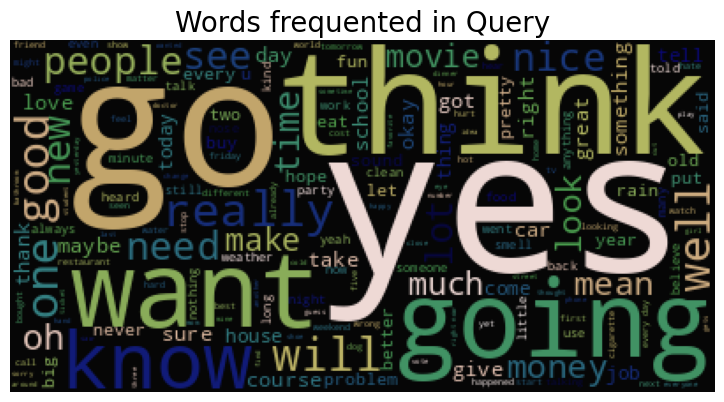

In [143]:
wordcloud(df,'Query')

In [144]:
print(df[['Query', 'Response']].head())


                                 Query  \
0               hi, how are you doing?   
1        i'm fine. how about yourself?   
2  i'm pretty good. thanks for asking.   
3    no problem. so how have you been?   
4     i've been great. what about you?   

                                   Response  
0             i'm fine. how about yourself?  
1       i'm pretty good. thanks for asking.  
2         no problem. so how have you been?  
3          i've been great. what about you?  
4  i've been good. i'm in school right now.  


In [145]:
import re
punc_lower=lambda x:re.sub('[%s]'%re.escape(string.punctuation),' ',x.lower())

In [146]:
df.head()

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249


In [147]:
remove_n=lambda x:re.sub("\n"," ",x)


In [148]:
df.head()

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249


In [149]:
remove_non_ascii=lambda x:re.sub(r'[^\x00.\x7f]',r'',x)


In [151]:
df.head()

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249


In [152]:
alpha_numeric=lambda x:re.sub('\w\d\w',' ',x)

In [153]:
df.head()

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249


In [109]:
df['Query']=df['Query'].map(alpha_numeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [110]:
df['Response']=df['Response'].map(alpha_numeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [154]:
df.head()

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249


In [155]:
df.head()

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249


In [156]:
pd.set_option('display.max_rows',1000)

In [157]:
df

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?,0.000,0.707,0.293,0.4404
3721,are you right-handed?,yes. all my life.,0.000,1.000,0.000,0.0000
3722,yes. all my life.,you're wearing out your right hand. stop using...,0.000,0.526,0.474,0.4019
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.,0.153,0.625,0.222,0.2500


In [158]:
imp_sent=df.sort_values(by='compound',ascending=False)
imp_sent.head(5)

,Query,Response,neg,neu,pos,compound
1019,"if we are good, we will be happy in heaven wit...",that's what many people believe.,0.0,0.400,0.600,0.9001
565,"yeah, it sounds like it's going to be the best...","exactly, it seems like it's going to be loads ...",0.0,0.463,0.537,0.8910
1235,that is a lot of friends. do you have a best f...,of course. i have lots of best friends.,0.0,0.400,0.600,0.8885
3414,"well, that's okay, as long as it helps him rel...","yes, we need a relaxed president who thinks cl...",0.0,0.419,0.581,0.8883
3470,so it's better to save money than to have an h...,"well, the democratic party says it was an hone...",0.0,0.482,0.518,0.8651


In [159]:
pos_sent=df.sort_values(by='pos',ascending=False)
pos_sent.head(5)

,Query,Response,neg,neu,pos,compound
1659,please?,you know the rules.,0.0,0.0,1.0,0.3182
1191,yes.,no. that's incomplete.,0.0,0.0,1.0,0.4019
223,"well, congratulations.",thank you.,0.0,0.0,1.0,0.7184
2745,i agree.,you never know what might happen on these free...,0.0,0.0,1.0,0.3612
3583,sure.,thank you.,0.0,0.0,1.0,0.3182


In [160]:
from sklearn.metrics.pairwise import cosine_distances

In [161]:
neg_sent=df.sort_values(by='neg',ascending=False)
neg_sent.head()

,Query,Response,neg,neu,pos,compound
1294,no.,how do you know?,1.000,0.000,0.0,-0.2960
2378,no.,he had dirty fingernails.,1.000,0.000,0.0,-0.2960
154,no problem.,did you need something?,1.000,0.000,0.0,-0.5994
3095,"no, i hate vegetables.",but you eat fruits.,0.855,0.145,0.0,-0.7096
13,"never better, thanks.",so how have you been lately?,0.828,0.172,0.0,-0.5875


In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [165]:
# Fit the TF-IDF vectorizer
factors = tfidf.fit_transform(df['Query']).toarray()

# Use get_feature_names_out instead of get_feature_names
feature_names = tfidf.get_feature_names_out()


In [168]:
ans=feature_names.tolist()
ans

['00',
 '000',
 '01',
 '10',
 '100',
 '101',
 '11',
 '12',
 '120',
 '13',
 '140',
 '15',
 '18',
 '1987',
 '20',
 '200',
 '2003',
 '22',
 '24',
 '25',
 '30',
 '300',
 '40',
 '400',
 '42',
 '44',
 '45',
 '456',
 '50',
 '60',
 '65',
 '75',
 '80',
 '85',
 '87',
 '90',
 '911',
 '91170',
 '98',
 '99',
 'able',
 'about',
 'absolutely',
 'accident',
 'accidents',
 'aches',
 'across',
 'act',
 'action',
 'activities',
 'actor',
 'actors',
 'actress',
 'actually',
 'add',
 'added',
 'adding',
 'address',
 'ads',
 'adventure',
 'afford',
 'afraid',
 'after',
 'afternoon',
 'afterwards',
 'again',
 'against',
 'age',
 'ago',
 'agree',
 'ahead',
 'aid',
 'aids',
 'air',
 'airport',
 'aisle',
 'alarm',
 'alice',
 'alive',
 'all',
 'allergic',
 'alley',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'altitude',
 'always',
 'am',
 'amateur',
 'amazing',
 'american',
 'an',
 'and',
 'andy',
 'angeles',
 'angry',
 'animal',
 'animals',
 'anita',
 'anniversary',
 'another',
 '

In [173]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatization_sentence(sentence):
    return ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(sentence)])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [174]:
query = 'who are you ?'
def chatbot(query):

       query = nu.lemmatization_sentence(query)
       query_vector = tfidf.transform([query]).toarray()
       similar_score = 1 -cosine_distances(factors,query_vector)
       index = similar_score.argmax()
       matching_question = df.loc[index]['Query']
       response = df.loc[index]['Response']
       pos_score = df.loc[index]['pos']
       neg_score = df.loc[index]['neg']
       neu_score = df.loc[index]['neu']
       confidence = similar_score[index][0]
       chat_dict = {'match':matching_question,
                'response':response,
                   'score':confidence,
                  'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
       return chat_dict


In [175]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatization_sentence(sentence):
    return ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(sentence)])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [177]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatization_sentence(sentence):
    return ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(sentence)])

def chatbot(query):
    query = lemmatization_sentence(query)  # Replaced with custom function
    query_vector = tfidf.transform([query]).toarray()
    similar_score = 1 - cosine_distances(factors, query_vector)
    index = similar_score.argmax()
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {
        'match': matching_question,
        'response': response,
        'score': confidence,
        'pos': pos_score,
        'neg': neg_score,
        'neu': neu_score
    }
    return chat_dict


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [181]:
while True:
    query = input('USER: ')
    if query == 'exit':
        break
    response = chatbot(query)

    if response['score'] <= 0.2:
        print("BOT: Please rephrase your question")
    else:
        print('=' * 80)

        # Handle missing keys safely, with a fallback for 'neu' (Neutral Score)
        neutral_score = response.get('neu', 'N/A')  # Default to 'N/A' if 'neu' is missing

        # Ensure correct formatting and avoid the TypeError
        print('logs:\n Matched Question: %s\n Confidence Score: %.2f\n Positive Score: %.2f\n Neutral Score: %.2f' % (
            response['match'],  # Using %s for strings (more appropriate than %r)
            response['score'] * 100,  # Confidence score in percentage
            response['pos'],  # Positive score
            neutral_score if neutral_score == 'N/A' else round(neutral_score, 2)  # Round neutral score to 2 decimal places if it's not 'N/A'
        ))

        print('=' * 80)
        print('BOT:', response['response'])



USER: hi
logs:
 Matched Question: hi, how are you doing?
 Confidence Score: 68.06
 Positive Score: 0.00
 Neutral Score: 1.00
BOT: i'm fine. how about yourself?
USER: I'm good.How are you?
logs:
 Matched Question: how are you doing that?
 Confidence Score: 55.05
 Positive Score: 0.00
 Neutral Score: 1.00
BOT: i started shopping at the dollar store.
USER: It seems it might rain today
logs:
 Matched Question: it seems that it may rain today.
 Confidence Score: 76.03
 Positive Score: 0.00
 Neutral Score: 1.00
BOT: hopefully it will.
USER: I really like rain
logs:
 Matched Question: you like the rain?
 Confidence Score: 77.16
 Positive Score: 0.46
 Neutral Score: 0.55
BOT: the sky looks so clean after it rains. i love it.
USER: It smells so fresh after rain
logs:
 Matched Question: me too. it always smells so fresh after it rains.
 Confidence Score: 49.94
 Positive Score: 0.25
 Neutral Score: 0.75
BOT: yes, but i love the night air after it rains.
USER: How about a movie?
logs:
 Matched Que